In [1]:
import numpy as np,os # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import os
from scipy.stats import wilcoxon, friedmanchisquare, rankdata, trim_mean
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def process(df,bigger_better=True):
    tmp = df.drop(columns=['pr_rec_score'],axis=1,level=2)  # matthews_corrcoef,pr_rec_score
    mat = tmp.droplevel(2,axis=1)
    rank = mat.copy()
    for d in mat.index:
        if bigger_better:
            rank.loc[d] = rankdata(1 - mat.loc[d])
        else:
            rank.loc[d] = rankdata(mat.loc[d])
    return rank, mat

In [4]:
Clean = pd.read_csv("Results/Clean.csv",header=[0,1,2],index_col=0)
Clean.shape

(32, 64)

In [6]:
Noisy = pd.read_csv("Results/Noisy.csv",header=[0,1,2],index_col=0)
Noisy.shape

(32, 64)

In [7]:
rank_clean,clean = process(Clean,bigger_better=True)
rank_noisy,noisy = process(Noisy,bigger_better=True)
noisy.shape,clean.shape

((32, 32), (32, 32))

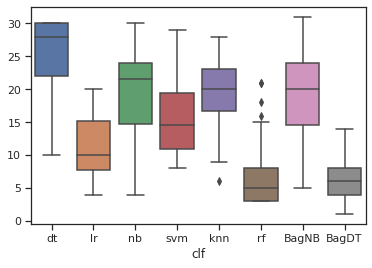

In [8]:
df = rank_clean
sns.boxplot(data=df.median(level=1,axis=1));

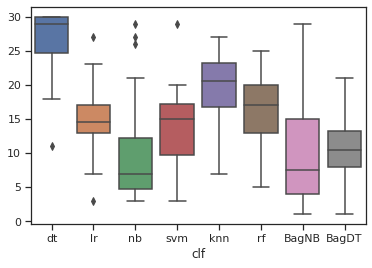

In [9]:
df = rank_noisy
sns.boxplot(data=df.median(level=1,axis=1));

In [10]:
N = noisy.median(level=1,axis=1).assign(State='Noisy')
C = clean.median(level=1,axis=1).assign(State='Clean')

In [11]:
comb = pd.concat([pd.melt(C,id_vars='State'),pd.melt(N,id_vars='State')],axis=0)
comb.shape,comb.columns

((512, 3), Index(['State', 'clf', 'value'], dtype='object'))

In [12]:
comb.columns = ['State', 'Imbalance Method', 'MCC']

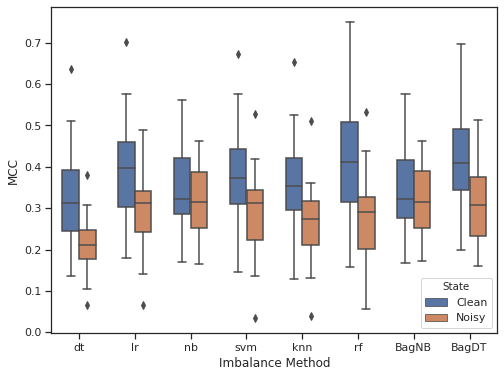

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Imbalance Method',y='MCC',data=comb,hue='State',width=.6);

In [ ]:
dMCC = C.drop("State",axis=1) - N.drop("State",axis=1)
dMCC.apply(lambda x:trim_mean(x,.05))/C.drop("State",axis=1).apply(lambda x:trim_mean(x,.05))

In [ ]:
for c in C.drop("State",axis=1):
    eff = pg.effsize.compute_effsize(C[c],N[c],eftype='hedges',paired=True)
    print(c,eff)

In [ ]:
base = 'nb'
df = N.drop("State",axis=1)
print(f"{base}:{trim_mean(df[base],.05):.4f}")
for c in df:
    if c==base: continue
    pv = wilcoxon(df[c],df[base]).pvalue
    print(c,f"{pv:.5f}",pv<.01,f"{trim_mean(df[c],.05):.4f}",)

In [ ]:
Noisy_Eval = pd.read_csv("Noisy_Eval_final.csv",header=[0,1,2],index_col=0)
Noisy_Eval.shape

In [ ]:
rank_noisy_eval,noisy_eval = process(Noisy_Eval,bigger_better=True)

In [ ]:
sns.boxplot(data=rank_noisy_eval.median(level=1,axis=1));

In [ ]:
CL = noisy.median(level=1,axis=1).assign(State='CL')
NL = noisy_eval.median(level=1,axis=1).assign(State='NL')

In [ ]:
comb = pd.concat([pd.melt(CL,id_vars='State'),pd.melt(NL,id_vars='State')],axis=0)
comb.shape,comb.columns

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='clf',y='value',data=comb,hue='State',width=.6);